In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def display_image(image, vmax):
    # Display the image
    plt.imshow(image, cmap='gray', vmin=0, vmax=vmax)
    plt.colorbar()
    plt.axis('off')
    # Show the plot
    plt.show()

In [3]:
def histogram_equalization(image):
    # Calculate the histogram
    histogram, _ = np.histogram(image.flatten(), bins=2**16, range=[0, 2**16-1])
    
    # Calculate the cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    
    # Normalize the CDF
    cdf_normalized = cdf / float(cdf.max())
    
    # Map the input image values to the equalized values
    equalized_image = np.interp(image.flatten(), np.arange(2**16), cdf_normalized * (2**16-1))
    
    # Reshape the equalized image to its original shape
    equalized_image = equalized_image.reshape(image.shape)
    
    # Convert the image data back to 16-bit integer type
    equalized_image = equalized_image.astype(np.uint16)
    
    return equalized_image


In [4]:
import os
import cv2
import numpy as np

folder_path = '../data/124-001'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
image_files = sorted(image_files)

# Create an empty array to store the multispectral image cube
image_cube = np.empty((12, ), dtype=object)

# Loop through the image files and read the first 12 images as 16 bit images
count = 0
for image_file in image_files:
    sequential_number = int(image_file.split('_')[-2])
    if 1 <= sequential_number <= 12:
        image_path = os.path.join(folder_path, image_file)
        print(image_path)
        # Read 16 bit image
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        # Crop the fragment region
        image= image[1690:3990, 2390:5460]
        image_cube[count] = image
        count += 1
        if count == 12:
            break

# Verify the shape of each image in the image cube
image_shape = image.shape
print("Image shape:", image_shape)

# Stack the images in the image cube along the first dimension
image_cube = np.stack(image_cube, axis=0)

# Verify the shape of the image cube
print("Image cube shape:", image_cube.shape)


../data/124-001/124-Fg001-R-C01-R01-D10112011-T101957-LR445_001_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102001-LR475_002_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102006-LR499_003_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102011-LR540_004_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102016-LR595_005_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102020-LR638_006_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102027-LR656_007_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102034-LR706_008_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102041-LR728_009_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102047-LR772_010_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102054-LR858_011_F.tif
../data/124-001/124-Fg001-R-C01-R01-D10112011-T102106-LR924_012_F.tif
Image shape: (2300, 3070)
Image cube shape: (12, 2300, 3070)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def show_image_with_circle(image_cube, coordinates, band_number):
    image = image_cube[band_number-1]  # Select the specified band (assuming 1-based index)
    image = histogram_equalization(image)

    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    
    for coord in coordinates:
        x, y = coord
        ax.add_patch(Circle((y, x), radius=5, color='red', fill=False))  # Draw a red circle around each pixel
        ax.text(y+5, x+5, '({}, {})'.format(x, y), color='red', fontsize=8)  # Add coordinate text near the circle
    
    ax.axis('off')
    plt.title("Image in Band {} with Circles".format(band_number))
    plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pixel_trend(image_cube, coordinates, category_name):
    fig, ax = plt.subplots()
    
    for coord in coordinates:
        x, y = coord
        gray_values = image_cube[:, x, y]
        print(gray_values)

        ax.plot(np.arange(1, 13), gray_values, marker='o', label="Pixel ({}, {})".format(x, y))

    ax.set_xlabel("Band")
    ax.set_ylabel("Gray Value")
    ax.set_title("Gray Value Trend for {} Pixels".format(category_name))
    ax.legend()
    plt.show()


In [45]:
def plot_combined_trend(image_cube, combined, category_names):
    fig, ax = plt.subplots()

    colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'black','orange', 'brown']  # Set colors for each category
    plots = []  # Store the plot objects for each category
    
    for i, coords in enumerate(combined):
        category_name = category_names[i]
        color = colors[i]  # Get color for the category

        for coord in coords:
            x, y = coord
            gray_values = image_cube[:, x, y]
            plot = ax.plot(np.arange(1, 13), gray_values, marker='o', color=color)
        
        plots.append(plot[0])  # Store the plot object for the category

    ax.set_xlabel("Band")
    ax.set_ylabel("Gray Value")
    ax.set_title("Gray Value Trend for Combined Pixels")
    ax.legend(plots, category_names)  # Use the plot objects and category_names in the legend
    # Set the y-axis tick interval to 10
    ax.yaxis.set_ticks(np.arange(0, 1500, 50))
    plt.show()


In [46]:
ink = [(955, 1820), (925, 1107), (1833, 1490), (680,2170)]
parchment = [(850, 870), (500,2133), (1762, 308), (1131,1352), (1185,552)]
back = [(524,605,), (239,596), (913, 2773), (119,126), (74,1235), (2170,2957)]
hole = [(846, 2212), (831, 2205), (640, 1218), (647,1221), (2086,414)]
rice = [(77, 1744), (361, 1304), (704, 2623), (1712, 1335)]
dark = [(120, 1093), (87, 1036), (58, 928), (786, 2574), (191,1684)]
light = [(2179, 113), (2171, 159), (2188, 557), (1773, 219), (1820,215), (189, 1868)]
non = [(1724, 1422), (1787, 1311), (596, 2689), (425, 1350), (1135, 2298)]

[106  99  88  86 104  84  87  96  98 106 101 117]
[ 97 104  89  89 102  87  88  89  88  99 112 121]
[ 95  98  84  80  87  80  87  90  88 102 104 113]
[ 93  96  80  97 103  84 102  98 101 106 105 109]
[ 96 101  91  95 102  91 107  96  99 111 113 120]
[ 96  99  87  92 110  87 100  87 100 104  95 110]


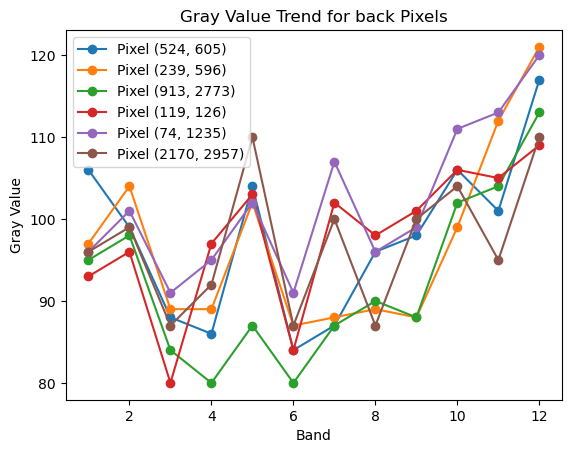

In [28]:
plot_pixel_trend(image_cube, back, 'back')

[110 112 107 116 129 119 123 127 123 136 163 194]
[169 166 154 167 199 171 184 184 183 209 221 257]
[114 119 117 102 111 103 112 119 116 136 148 172]
[ 98 111  94  93 112 101 115 106 102 125 141 175]


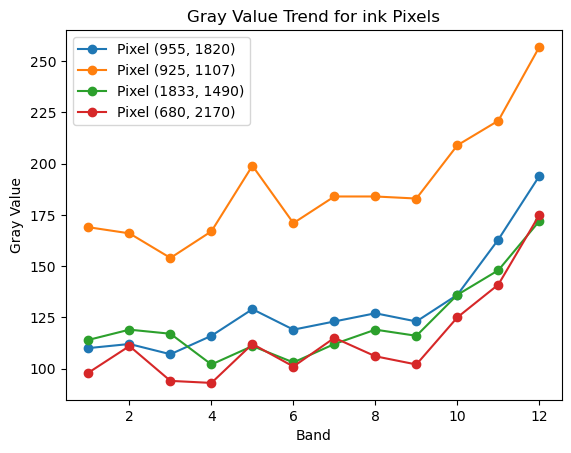

In [29]:
plot_pixel_trend(image_cube, ink, 'ink')

[ 21  17  17  15  19  22  29  41  44  54  79 114]
[ 49  49  47  43  54  45  49  65  64  82  93 129]
[ 27  27  25  22  31  31  37  54  68  78  96 131]
[ 30  31  29  32  39  40  47  60  73  90 110 146]
[ 14  18  16  20  27  35  41  60  67  93 126 167]


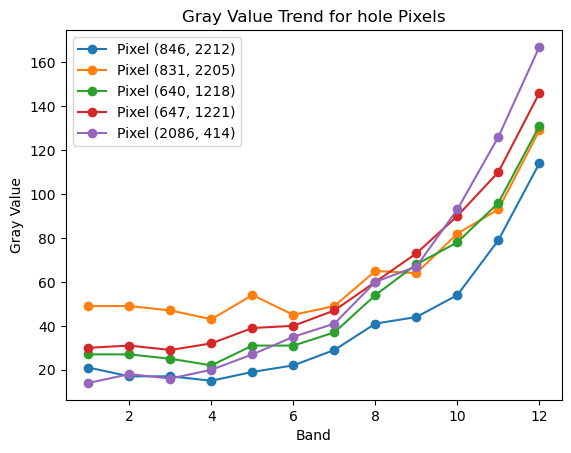

In [30]:
plot_pixel_trend(image_cube, hole, 'hole')

[106  99  88  86 104  84  87  96  98 106 101 117]
[ 97 104  89  89 102  87  88  89  88  99 112 121]
[ 95  98  84  80  87  80  87  90  88 102 104 113]
[ 93  96  80  97 103  84 102  98 101 106 105 109]
[ 96 101  91  95 102  91 107  96  99 111 113 120]
[ 96  99  87  92 110  87 100  87 100 104  95 110]


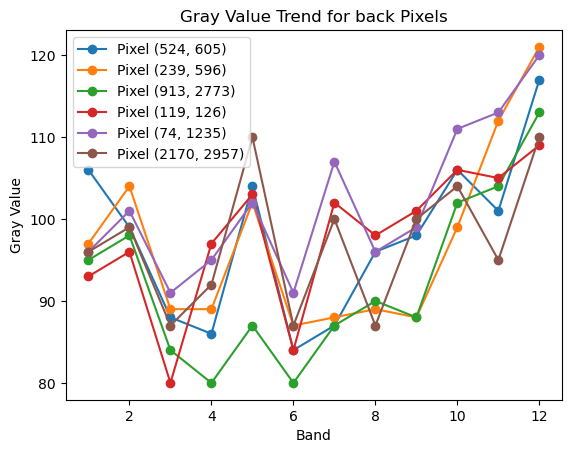

In [31]:
plot_pixel_trend(image_cube, back, 'back')

[110 112 107 116 129 119 123 127 123 136 163 194]
[169 166 154 167 199 171 184 184 183 209 221 257]
[114 119 117 102 111 103 112 119 116 136 148 172]
[ 98 111  94  93 112 101 115 106 102 125 141 175]


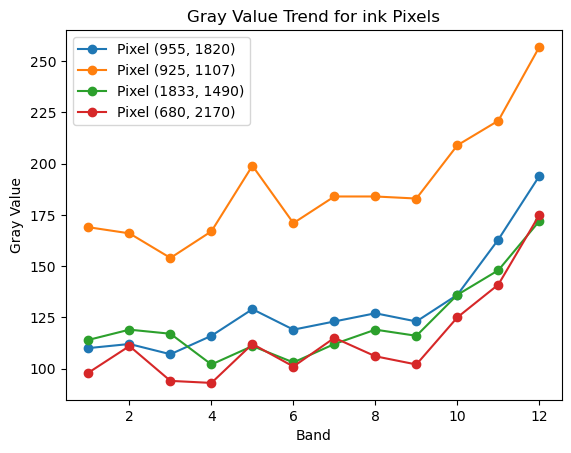

In [32]:
plot_pixel_trend(image_cube, ink, 'ink')

[130 123 117 107 123 111 119 115 117 130 182 269]
[146 142 131 133 144 125 131 115 134 153 295 431]
[157 145 126 124 139 118 132 133 138 175 272 391]
[ 84  89  93 123 172 185 189 237 263 327 489 610]
[ 98  93  90  98 106  92 100  99  96 104 127 169]


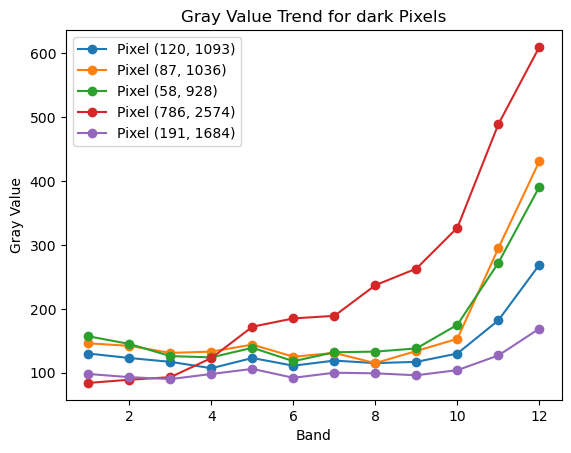

In [33]:
plot_pixel_trend(image_cube, dark, 'dark')

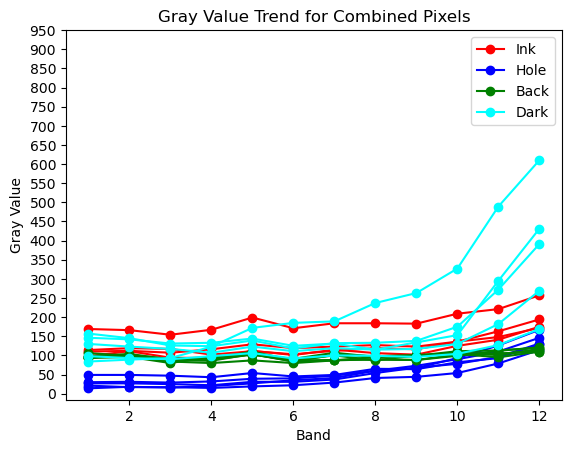

In [34]:
combined = [ink, hole, back, dark]
category_names = ['Ink', 'Hole', 'Back', 'Dark']

plot_combined_trend(image_cube, combined, category_names)

[1005 1094 1110 1214 1463 1271 1306 1282 1273 1348 1399 1381]
[1149 1264 1222 1342 1503 1267 1403 1297 1287 1330 1345 1299]
[ 849  968 1002 1114 1359 1226 1313 1305 1275 1375 1443 1471]
[ 967 1139 1108 1263 1513 1371 1416 1353 1347 1463 1547 1539]
[1022 1042 1053 1135 1374 1206 1206 1151 1165 1234 1305 1315]


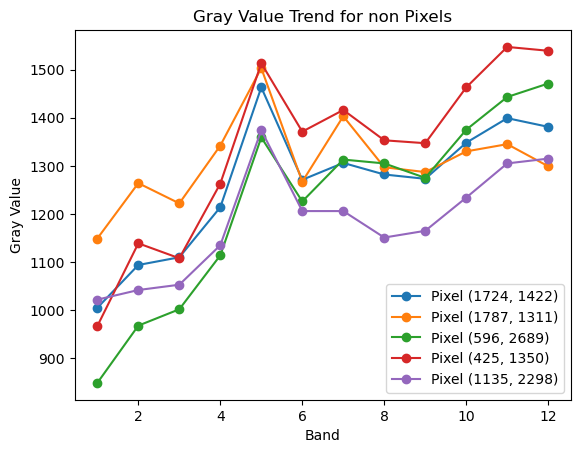

In [47]:
plot_pixel_trend(image_cube, non, 'non')

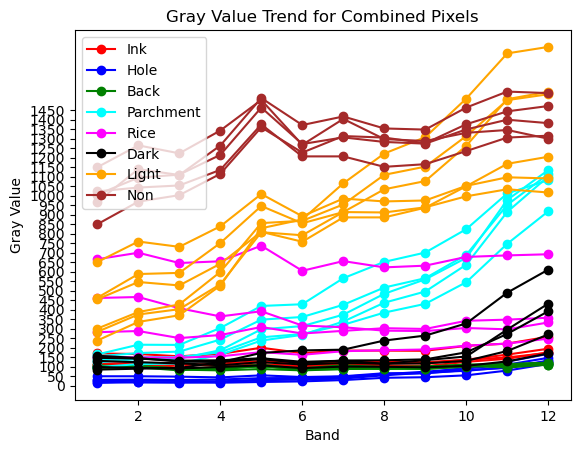

In [50]:
combined = [ink, hole, back, parchment, rice, dark, light, non]
category_names = ['Ink', 'Hole', 'Back', 'Parchment', 'Rice', 'Dark','Light','Non']

plot_combined_trend(image_cube, combined, category_names)

[ 154  171  179  242  347  361  425  516  565  688  951 1113]
[133 149 150 175 254 271 320 384 430 544 746 917]
[ 164  215  214  303  419  428  565  651  700  823 1011 1081]
[ 122  140  142  186  296  313  373  483  559  672  977 1134]
[  97  113  116  162  237  267  337  436  495  636  914 1100]


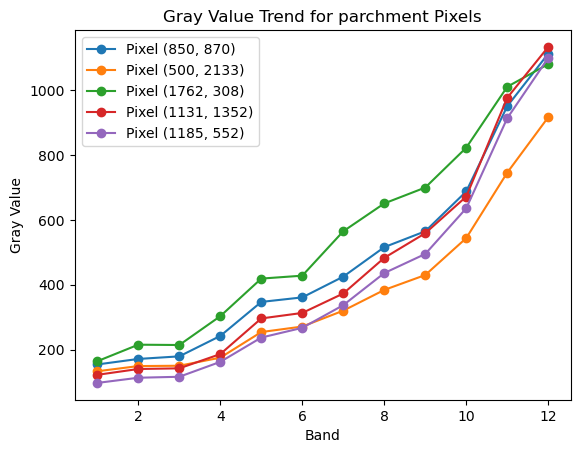

In [49]:
plot_pixel_trend(image_cube, parchment, 'parchment')

[ 237  335  370  526  828  874 1064 1221 1307 1510 1748 1782]
[ 283  374  402  533  807  791  913 1033 1076 1262 1507 1546]
[ 300  387  427  598  855  867  953 1109 1152 1313 1502 1533]
[ 454  545  527  641  809  757  885  885  936 1049 1167 1204]
[338 342 308 300 318 274 286 295 298 315 338 366]


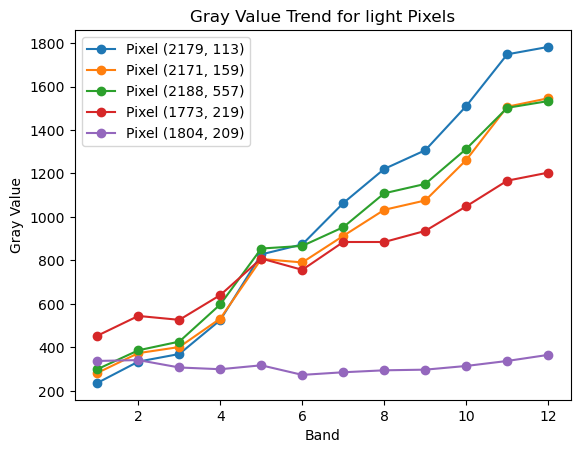

In [37]:
plot_pixel_trend(image_cube, light, 'light')

[281 287 250 266 308 274 288 302 298 341 347 357]
[665 699 645 654 736 604 655 622 631 677 685 691]
[153 148 147 154 176 162 181 186 190 210 221 247]
[461 466 407 364 391 316 307 289 287 303 296 332]


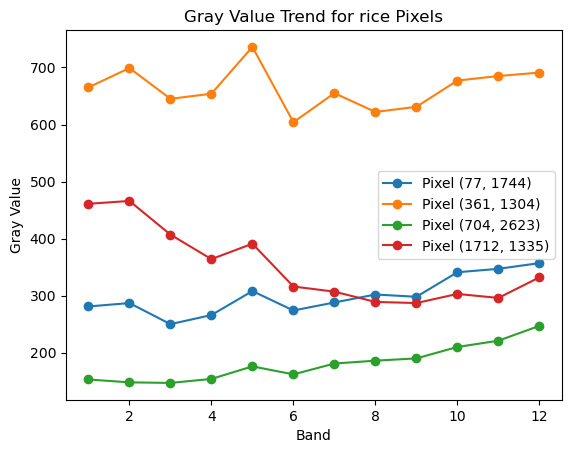

In [38]:
plot_pixel_trend(image_cube, rice, 'rice')

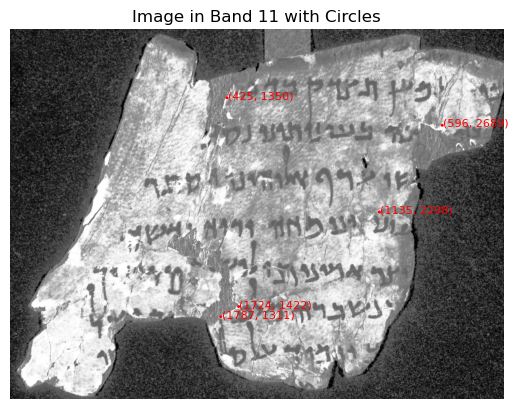

In [51]:
show_image_with_circle(image_cube, non, 11)

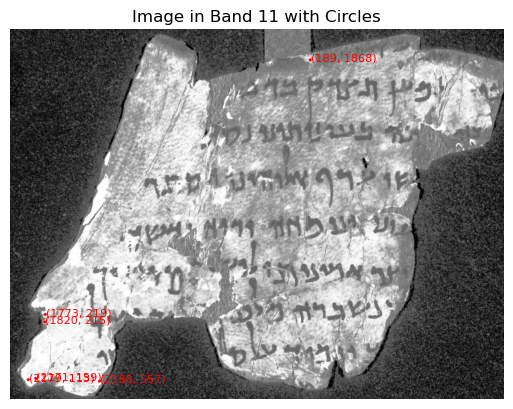

In [52]:
show_image_with_circle(image_cube, light, 11)

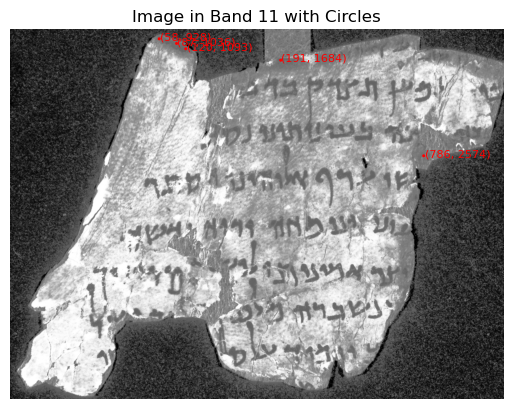

In [17]:
show_image_with_circle(image_cube, dark, 11)

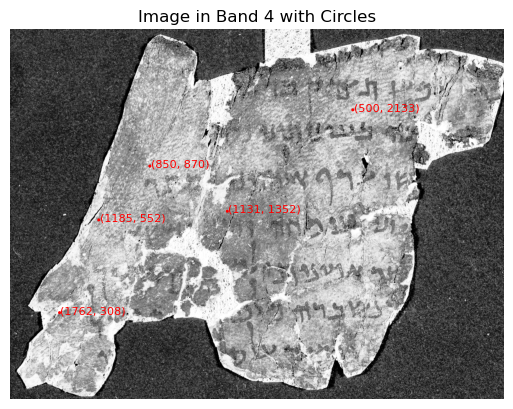

In [18]:
show_image_with_circle(image_cube, parchment, 4)

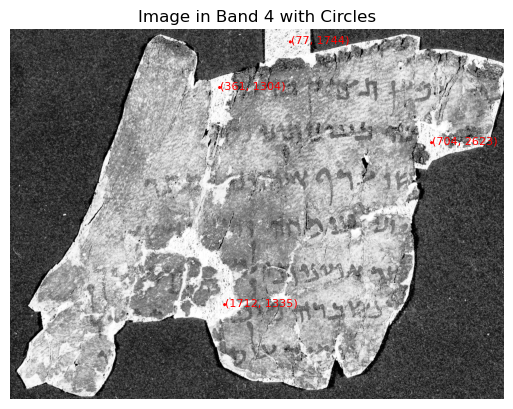

In [19]:
show_image_with_circle(image_cube, rice, 4)

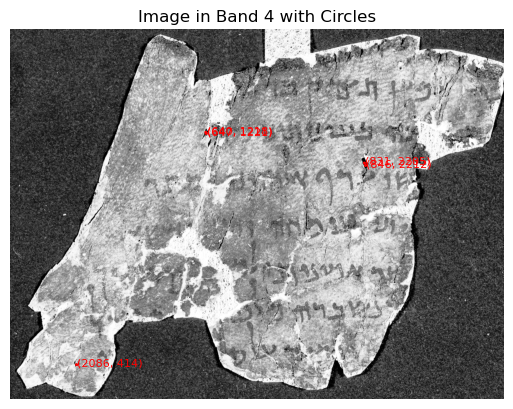

In [20]:
show_image_with_circle(image_cube, hole, 4)

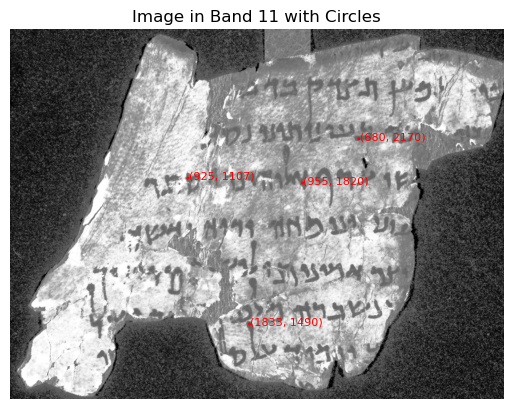

In [21]:
show_image_with_circle(image_cube, ink, 11)

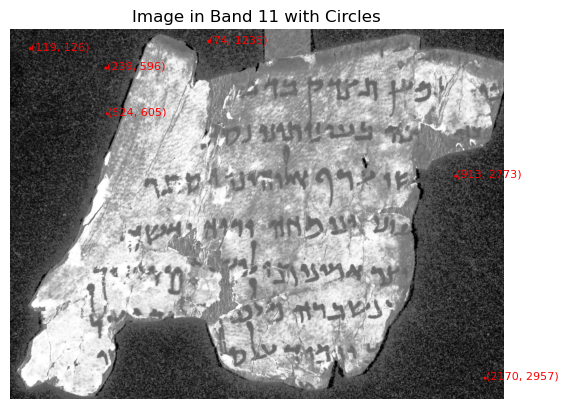

In [22]:
show_image_with_circle(image_cube, back, 11)